# COMP2200/COMP6200 Prac - Week 4

_Author: Benjamin Pope (benjamin.pope@mq.edu.au)_

---

In lectures this week, we learned about fitting models to data - linear and logistic regression. In this practical we will use `scikit-learn` to model higher-dimensional data, including polynomial regression for the fish market dataset, with ridge and lasso regression. We will also look at logistic regression for the Titanic dataset.

**Please submit the completed notebook for this workshop to your GitHub Classroom for marking!**

Remember to using a notebook, you need to run each cell. If left side of a cell says `[ ]`, it hasn't been run. If the left side
says something like `[25]` then it has been. Shift-Enter runs a cell; if you look around the user interface, various other menu items can run several cells in sequence.

In [35]:
#from statistics import LinearRegression, covariance
#from xml.sax.handler import feature_namespaces

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from IPython.core.display_functions import publish_display_data
#from jupyter_server.terminal import initialize
#from matplotlib.widgets import Lasso
from sklearn import linear_model, preprocessing, metrics, model_selection #datasets,
from glob import glob
from sklearn.model_selection import train_test_split

#from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler




---

There is a great dataset on Kaggle, which we looked at in part on Monday's lecture: the 'fish market dataset' containing the dimensions and weight of fish. This is a good opportunity to [set up a Kaggle API key](https://www.kaggle.com/docs/api) if you haven't already, so that you can automatically download the dataset.

In [36]:
# Load the Fish Market dataset from Kaggle

import kagglehub

# Download the latest version
path = kagglehub.dataset_download("vipullrathod/fish-market")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1


Always make a quick visualization of your data! In the code below, we are restricting ourselves to just a single species; modify this code to include all species.

In [37]:
# visualize the table data
fname = glob(path + "/*.csv")[0]
df = pd.read_csv(fname)
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


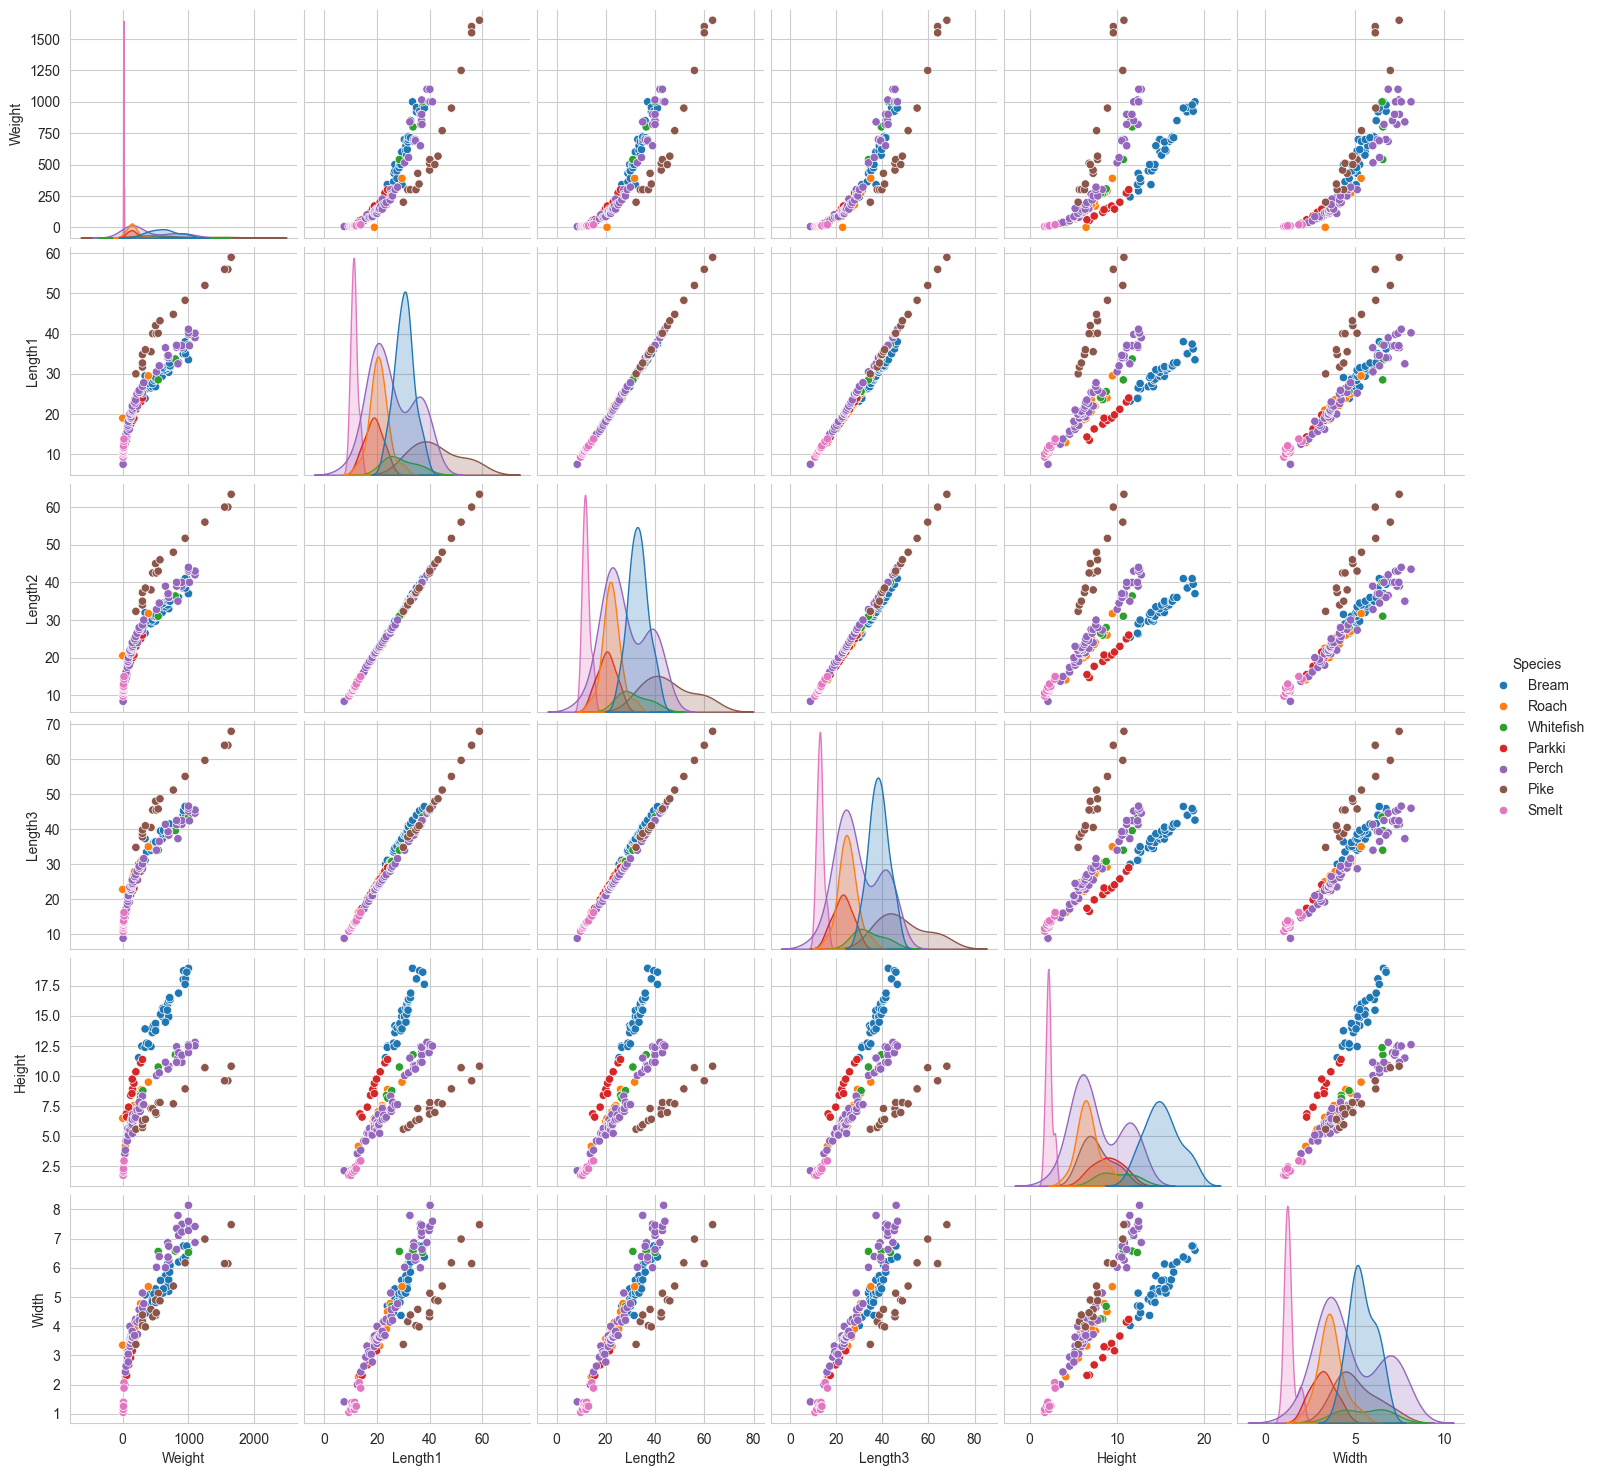

In [38]:
#display data for all fish from table
pair_all = sns.pairplot(df, hue="Species", kind='scatter')

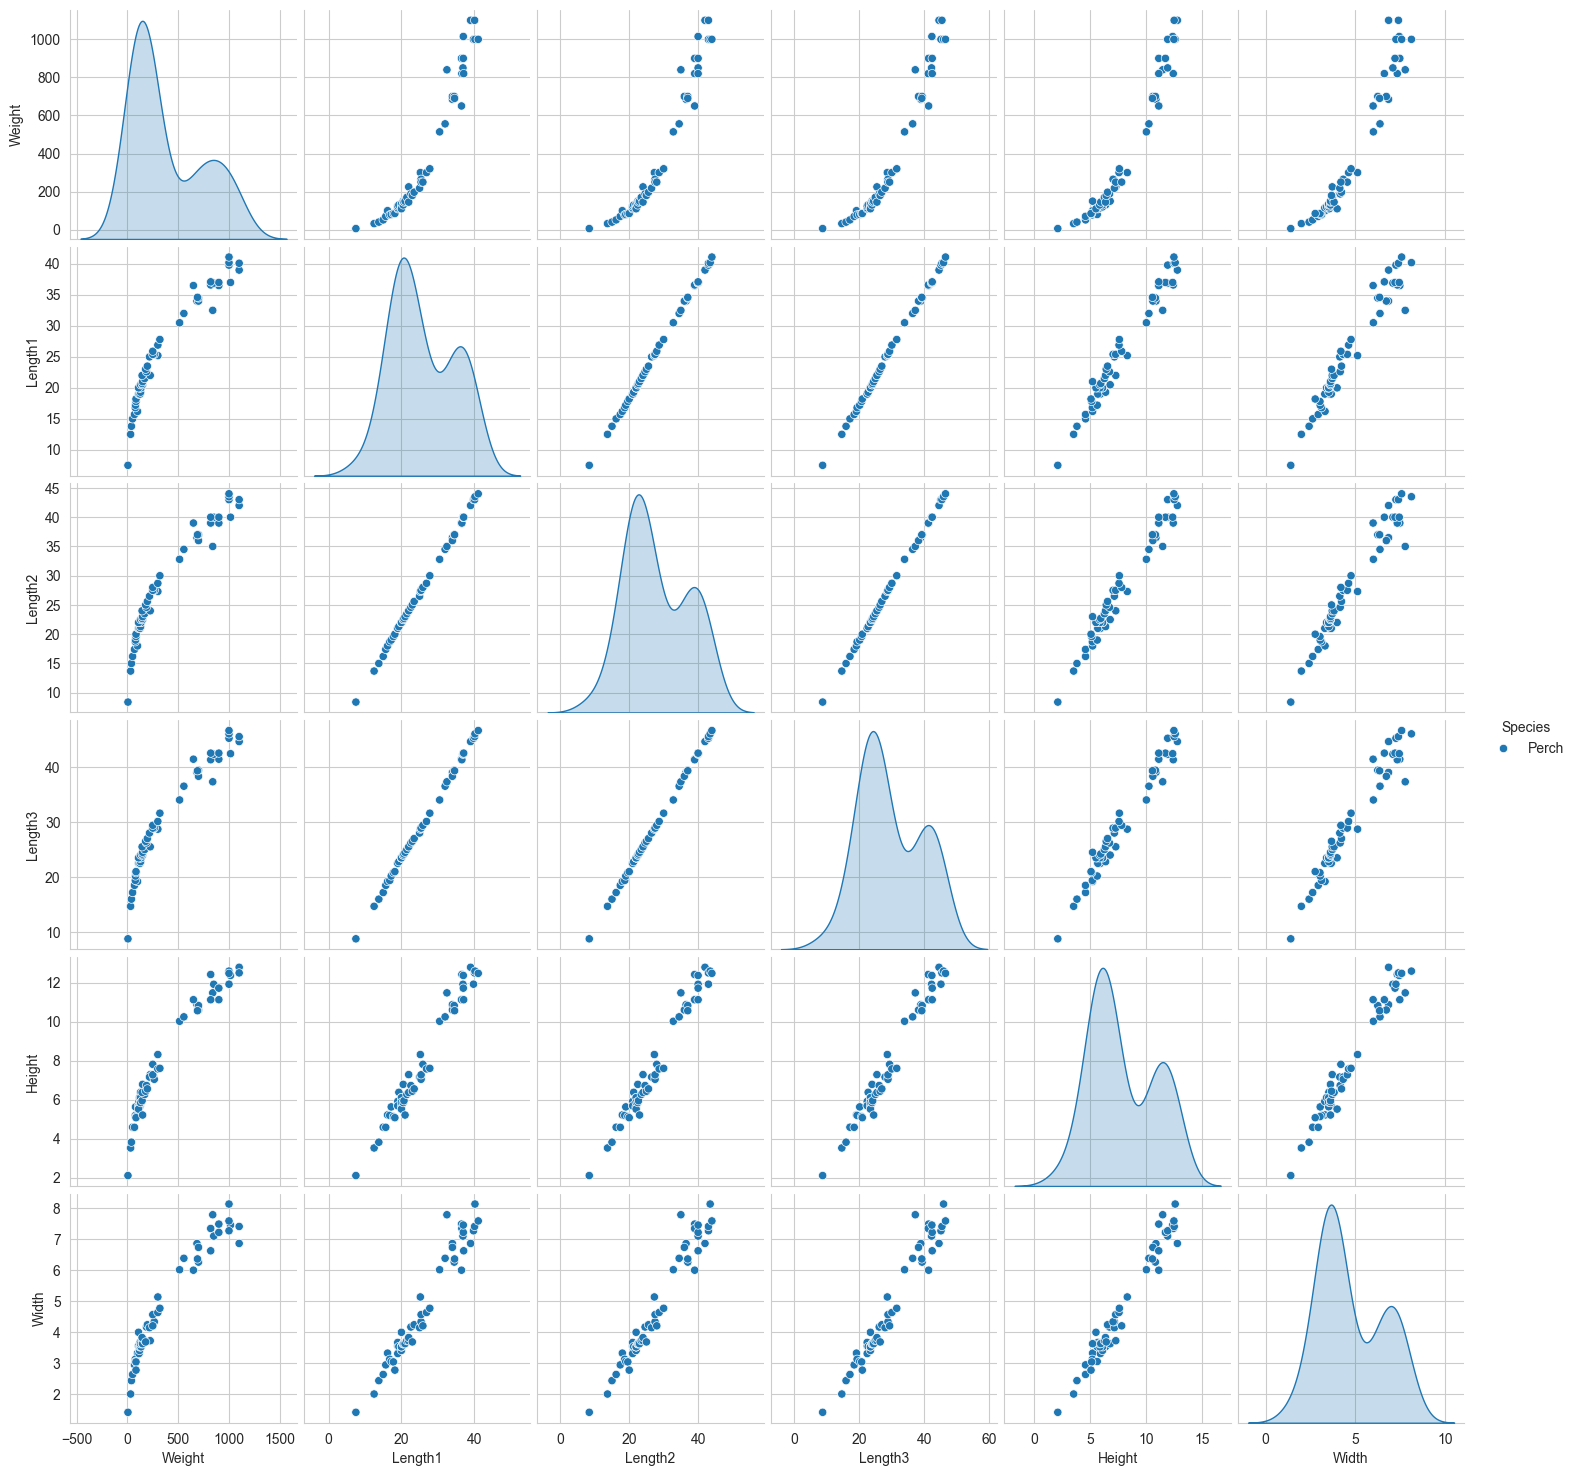

In [39]:
# plot data for Perch fish only
pair = sns.pairplot(df[df.Species=='Perch'],hue="Species",kind='scatter')

First, you want to preprocess the data to be normalized.

(Advanced: skip this step and see what happens to the results of the regression models! We expect polynomial models to become unstable.)

In [40]:
# We can use MinMaxScaler to normalize the data, but using preprocessing to avoid manual implementation issues,
# this is to normalize the data and scale all the data in a range of zero to 1.
scaler = preprocessing.MinMaxScaler()
params = ['Weight','Length1','Length2','Length3','Height','Width']

# Computes the min/max values for the columns in `params`
scaler.fit(df[params])

df[params] = scaler.transform(df[params])

In [41]:
print(df[params])

       Weight   Length1   Length2   Length3    Height     Width
0    0.146667  0.304854  0.309091  0.358108  0.568334  0.418978
1    0.175758  0.320388  0.325455  0.378378  0.624055  0.459235
2    0.206061  0.318447  0.329091  0.376689  0.618123  0.514279
3    0.220000  0.365049  0.374545  0.417230  0.638566  0.480365
4    0.260606  0.368932  0.374545  0.425676  0.621966  0.576004
..        ...       ...       ...       ...       ...       ...
154  0.007394  0.077670  0.069091  0.077703  0.021012  0.048771
155  0.008121  0.081553  0.072727  0.079392  0.040723  0.031208
156  0.007394  0.089320  0.083636  0.084459  0.031842  0.029347
157  0.011939  0.110680  0.107273  0.108108  0.066424  0.143719
158  0.012061  0.122330  0.120000  0.125000  0.069872  0.117219

[159 rows x 6 columns]


First, in the cell below, create test and training sets, using `sklearn.model_selection.train_test_split`. A good split is 80% training and 20% testing.

In [42]:
train, test = train_test_split(df[df.Species=='Perch'], test_size=0.2)

In [43]:
train.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
115,Perch,0.418182,0.526214,0.520000,0.515203,0.513292,0.749746
102,Perch,0.181818,0.343689,0.343636,0.336149,0.382771,0.576469
82,Perch,0.066667,0.223301,0.229091,0.231419,0.230088,0.353434
107,Perch,0.181818,0.376699,0.369091,0.359797,0.339946,0.505723
97,Perch,0.087879,0.281553,0.283636,0.282095,0.269703,0.391492


Let us begin by doing some linear regression between the linear dimensions of the fish, just to play around with some things that really are pretty linear. 

In the cell below, use `sklearn.linear_model.LinearRegression` to fit a linear model to the fish market data, showing examples for:
- Width vs. Length1, Length2, Length3
- Height vs. Length1, Length2, Length3
- Width vs. Height
- Width vs. both Length1 *and* Height - doing multi linear regression

For each of these, print the coefficients and the

- R-squared, 
- RMSE, and 
- MAE  

values for the training and testing data. Which performed the best in training? Which performed the best on test?

*Always* over plot the predictions on the data, and make sure to label the axes and the plot.


Model coefficients: [0.31748879 0.36089495 0.38625603]
R-squared: 0.9003
RMSE: 0.0798
MAE: 0.0290


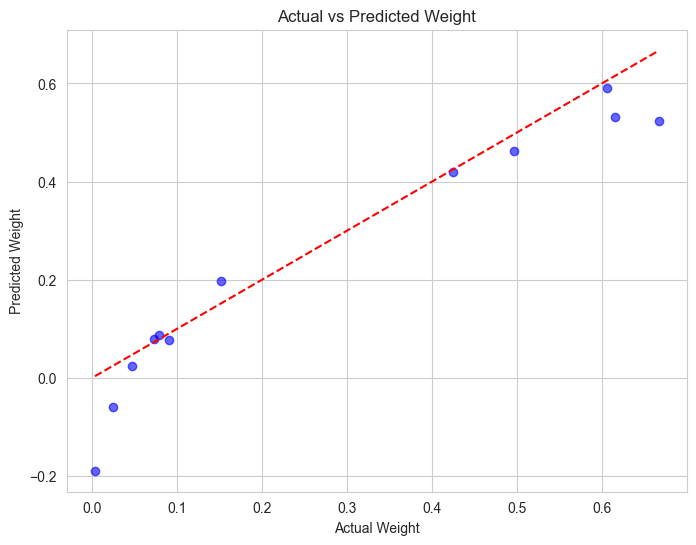

In [44]:
#model = linear_model.LinearRegression()
#X = np.array(train[['Length1', 'Width', 'Height']])
#model.fit(X, train['Weight'])
#print ("Model coefficients:", model.coef_)

model = linear_model.LinearRegression() #creat and fit liner regression model

# features x and target y for training data set

x_train = np.array(train[['Length1', 'Width', 'Height']])
y_train = np.array(train['Weight'])

#fit the model
model.fit(x_train, y_train)

#print model coefficients
print(f"Model coefficients:", model.coef_);

#use the model to predict on the test data
x_test = np.array(test[['Length1', 'Width', 'Height']])
y_test = np.array(test['Weight'])
y_pred = model.predict(x_test)

#evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.median_absolute_error(y_test, y_pred)

#print r-squared, rmse, and mae for the test set
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

#plot the predicted vs. actual weight values for the test set
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue' , alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') #ideal prediction line
plt.title("Actual vs Predicted Weight")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.show()

Advanced: use the design matrix from above to calculate the uncertainty in the coefficients, models from a multivariate normal distribution, and illustrate the uncertainty in the model.

coefficients: [0.31748879 0.36089495 0.38625603]
standard errors of coefficients: [0.22997033 0.14525378 0.30461576]


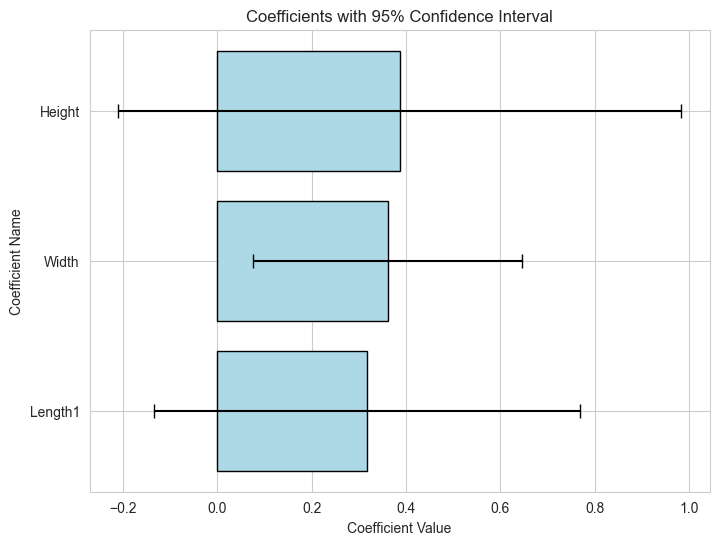

In [45]:
#residuals = model.predict(X) - train['Weight']
#uncertainty = ...

# Assuming that the datasheet is already loaded and scaled (as described earlier),
# let's assume 'train' is the dataframe with the fish market data, and we've scaled it

#step 1: To setup the training data
#x = np.array(train[['Length1', 'Width', 'Height']]) #Features (predictors)
#y = train['Weight'] #target variable (fish weight)

# step2: For the linear regression model
# model = LinearRegression()
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

#step 3: Calculate the residual
#residuals are difference between actuals and predicated values
y_pred = model.predict(x_train) #predictated values from the model
residuals = y_train - y_pred #actual values minus predicted values

#estimate the variance of the residuals
n = len(y_train)
p = x_train.shape[1]
residual_sum_of_squares = np.sum(residuals**2) # sum of squared residuals

#calcluate the variance of the residuals
sigma_squared = residual_sum_of_squares / (n-p) # unbiased estimation of the variance

# step 5: calculate the covariance matrix of the coefficients
# covariance matrix formula cov(B) = sigma**2 (X**T * X)**-1
x_train_transpose = x_train.T #transpose of the design matrix
covariance_matrix = sigma_squared * np.linalg.inv(np.dot(x_train_transpose, x_train))

# Step 6: calculate the basic standard errors of the coefficients (square root of diagonal elements of the covariance matrix)
standard_errors = np.sqrt(np.diag(covariance_matrix))

#step 7: Print the coefficients and standard errors
print(f"coefficients:", model.coef_)
print(f"standard errors of coefficients:", standard_errors)

# Step 8: visualize the uncertainty
import matplotlib.pyplot as plt

# Visualize the coefficient with their 95% confidence interval (standard error * 1.96 for 95% CI)
feature_names = ['Length1', 'Width', 'Height']

plt.figure(figsize=(8, 6))
plt.barh(feature_names, model.coef_, xerr= 1.96 * standard_errors, capsize=5, color = 'lightblue', edgecolor = 'black')
plt.title("Coefficients with 95% Confidence Interval")
plt.xlabel("Coefficient Value")
plt.ylabel("Coefficient Name")
plt.show()




Now we want to do something more advanced: as we know, the weight of something that scales with the volume, which is not linear at all! We should do a *polynomial* regression.

In [46]:
poly = preprocessing.PolynomialFeatures(degree=3)

poly_features = poly.fit_transform(x_train)
model.fit(poly_features, train['Weight'])
print(f"Model coefficients:", model.coef_)


Model coefficients: [ 0.00000000e+00 -9.83973076e-02 -6.59327924e-01  6.68076611e-01
  2.43864090e+01 -2.53079763e+01 -9.48448195e+00 -8.29892341e-01
  3.25733664e+01 -2.13793228e+01  6.38196124e+00  1.17674243e+02
 -2.78078893e+02 -2.27891391e+02  5.12836362e+02 -6.99717660e+01
  4.95073678e+01  1.54666895e+01 -3.34077750e+02  2.07272431e+02]


(array([ 1.,  1.,  1.,  0.,  0.,  0.,  7., 10., 13.,  6.,  0.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.02778455, -0.02441478, -0.02104501, -0.01767524, -0.01430547,
        -0.0109357 , -0.00756593, -0.00419615, -0.00082638,  0.00254339,
         0.00591316,  0.00928293,  0.0126527 ,  0.01602247,  0.01939225,
         0.02276202,  0.02613179,  0.02950156,  0.03287133,  0.0362411 ,
         0.03961087]),
 <BarContainer object of 20 artists>)

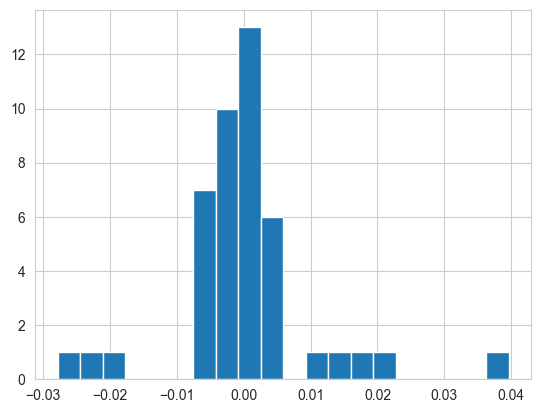

In [47]:
residuals = model.predict(poly_features) - train['Weight']
plt.hist(residuals, bins=20)

There is an efficient way to automate taking multiple steps: `sklearn.pipeline.Pipeline`. 

We use it like this:

In [48]:
from sklearn.pipeline import Pipeline

r2s = []
maes = []
rmses = []

max_order = 10

for polyfeatures in range(1, max_order):
    
    steps = [
        ("scalar", preprocessing.StandardScaler()), # scaling is especially important when using polynomial features
        ("poly", preprocessing.PolynomialFeatures(degree = polyfeatures)),
        ("model", linear_model.LinearRegression())
    ]

    pipe = Pipeline(steps)

    pipe.fit(x_train, train['Weight'])

    r2 = metrics.r2_score(test['Weight'], pipe.predict(x_test))
    mae = metrics.median_absolute_error(test['Weight'], pipe.predict(x_test))
    rmse = np.sqrt(metrics.mean_squared_error(test['Weight'], pipe.predict(x_test)))
    r2s.append(r2) # r2
    maes.append(mae) # median absolute error
    rmses.append(rmse) # root mean squared error

Using this framework, explore what polynomial order fits the data best, and generate the summary statistics for the training *and* testing data.

Which polynomial order fits the data best? Do you notice any overfitting—where the training data fits very well, but the testing data does not?

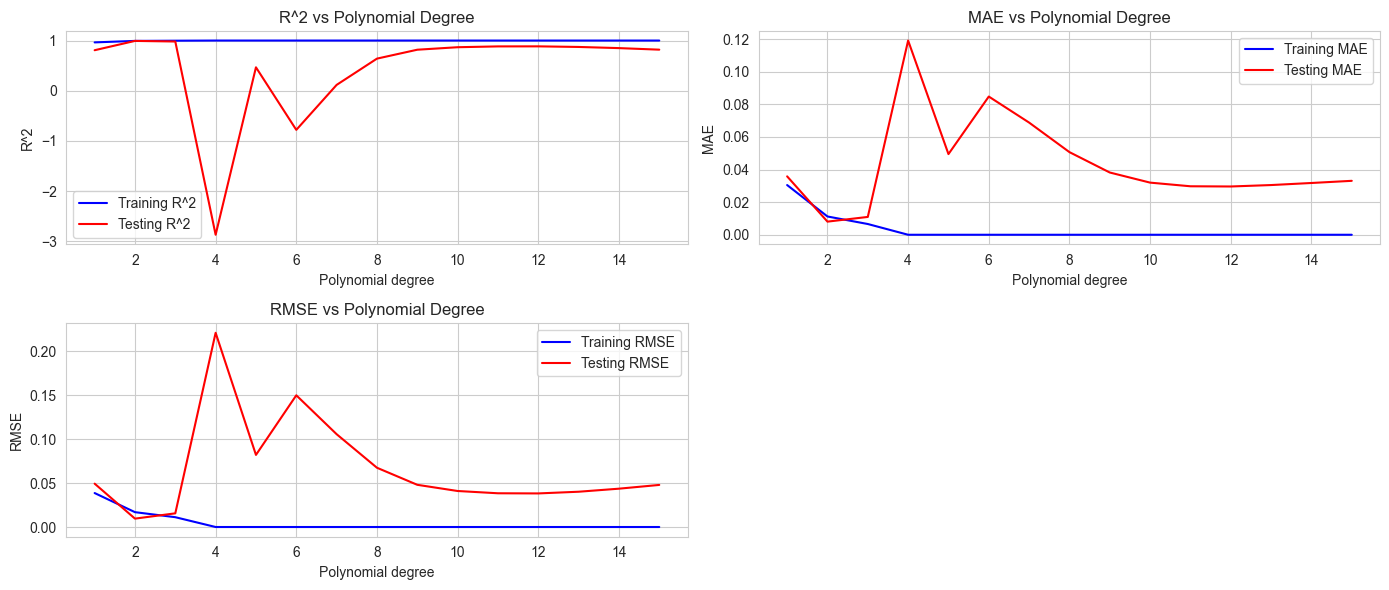

In [49]:
# Assuming train is the dataframe with scaled data (Length1, Width, Height, Weight)
# Define X (features) and y (target)
x = np.array(train[['Length1', 'Width', 'Height']]) # Features
y = train['Weight'] # Target variable (Weight)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#initialize the linear regression model
model = linear_model.LinearRegression()
#model = LinearRegression()

#initialize lists store the performance metrics for each polynomial degree
r2s_train = []
r2s_test = []
maes_train = []
maes_test = []
rmses_train = []
rmses_test = []

# Loop over different polynomial degrees
max_degree = 15
for degree in range(1, max_degree + 1):
    # Creat polynomial features
    poly = PolynomialFeatures(degree=degree)

    # Transform the training and testing data
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # Fit the model with polynomial features
    model.fit(x_train_poly, y_train)

    # Make prediction on both training and testing sets
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Compute performance matrix for training data
    r2_train = metrics.r2_score(y_train, y_train_pred)
    mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    # Compute the performance matrix for testing data
    r2_test = metrics.r2_score(y_test, y_test_pred)
    mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    # Store the matrix in the lists
    r2s_train.append(r2_train)
    r2s_test.append(r2_test)
    maes_train.append(mae_train)
    maes_test.append(mae_test)
    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)

# Plot the performance matrix for different polynomial degrees
plt.figure(figsize=(14, 6))

# plot R^2 values
plt.subplot(2, 2, 1)
plt.plot(range(1, max_degree + 1), r2s_train, label="Training R^2", color="blue")
plt.plot(range(1, max_degree + 1), r2s_test, label="Testing R^2", color="red")
plt.title("R^2 vs Polynomial Degree")
plt.xlabel("Polynomial degree")
plt.ylabel("R^2")
plt.legend()

# Plot maes values
plt.subplot(2, 2, 2)
plt.plot(range(1, max_degree + 1), maes_train, label="Training MAE", color="blue")
plt.plot(range(1, max_degree + 1), maes_test, label="Testing MAE", color="red")
plt.title("MAE vs Polynomial Degree")
plt.xlabel("Polynomial degree")
plt.ylabel("MAE")
plt.legend()

#plot rmses values
plt.subplot(2, 2, 3)
plt.plot(range(1, max_degree + 1), rmses_train, label="Training RMSE", color="blue")
plt.plot(range(1, max_degree + 1), rmses_test, label="Testing RMSE", color="red")
plt.title("RMSE vs Polynomial Degree")
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# After plotting, examine where overfitting occurs

# Split the data into training (80) and testing (20) sets

## Regularization

We have a lot of features in the design matrix as we go to high polynomial order—too many relative to the amount of data. This can lead to overfitting—but fortunately [we can deal with that using regularization](https://arxiv.org/abs/2101.07256).

Let's start with Ridge regression. Mathematically, this puts an L2 penalty on the size of the coefficients: where L2 means the sum of the squares of the coefficients. The Lasso model, on the other hand, puts an L1 penalty on the coefficients: where L1 means the sum of the *absolute values* of the coefficients. In this case, your likelihood is

$$
\mathcal{L_\text{ridge}} = \under brace{\sum_i \left( y_i - \sum_j X_{ij} \beta_j \right)^2}_{\text{log-likelihood}} + \under brace{\alpha \sum_j \beta_j^2}_{\text{penalty}}
$$

where $\alpha$ is an arbitrary hyperparameter that controls the strength of the penalty.

In [50]:
# Use it like this
ridge = linear_model.Ridge(alpha = 0.1) # play with alpha
ridge.fit(x, train['Weight']);

lasso = linear_model.Lasso(alpha = 0.1) # play with alpha
lasso.fit(x, train['Weight']);

In the cell below, use a pipeline and a for loop, like above, to fit Ridge and Lasso models to the fish market data with a range of regularization: which set of coefficients give you the best performance on the test data?

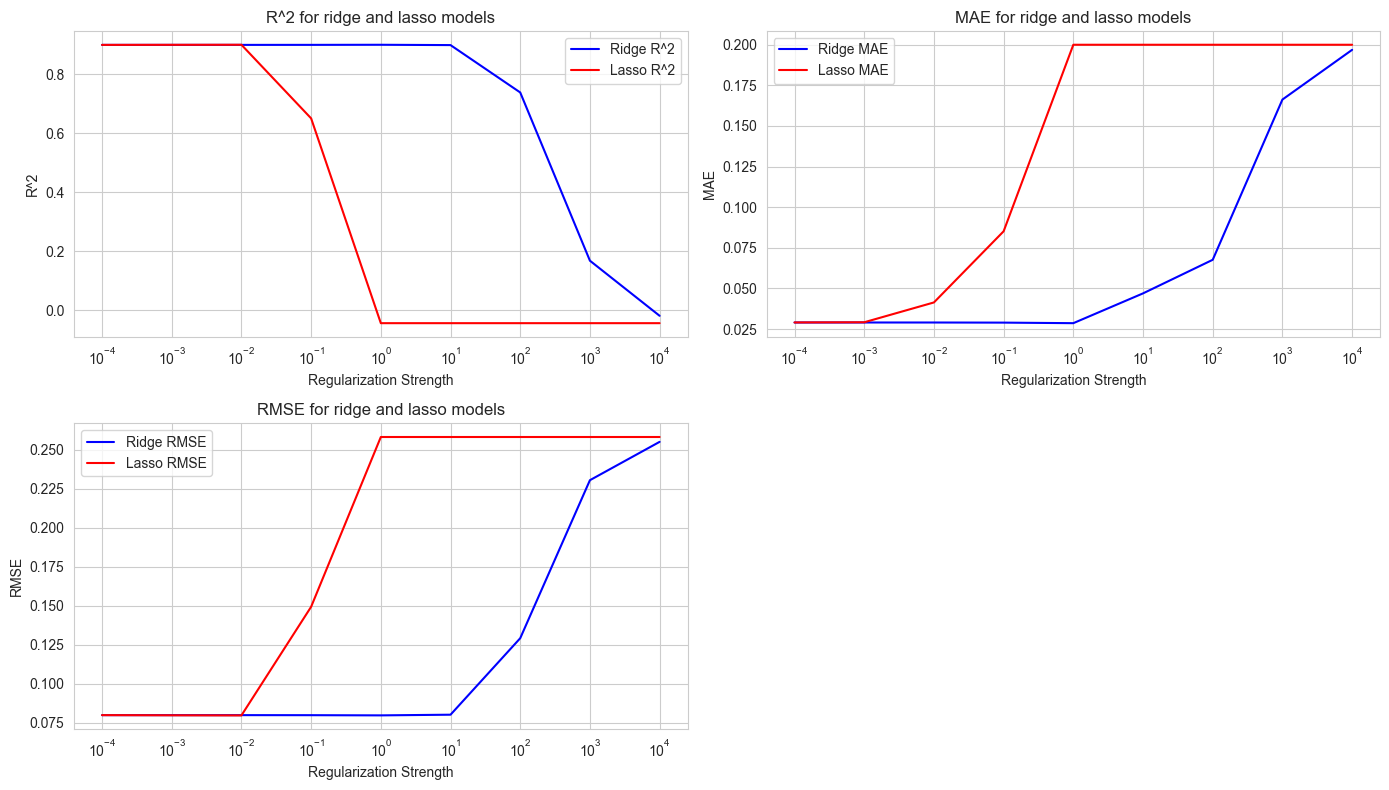

Best alpha for ridge: 1.0
Best alpha for lasso: 0.01


In [51]:
#assuming 'train' is your dataframe and test is test set
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

x_train = np.array(train[['Length1', 'Width', 'Height']])
y_train = train['Weight']

x_test = np.array(test[['Length1', 'Width', 'Height']])
y_test = test['Weight']

# Regularization strengths to try
alpha_values = np.logspace(-4, 4, 9)    #range of alpha value (log scale)

#intialize list to store results

ridge_r2s = []
lasso_r2s = []
ridge_maes = []
lasso_maes = []
ridge_rmses = []
lasso_rmses = []

# loop over alpha values for ridge and lasso models
for alpha in alpha_values:
    # Ridge regression pipeline
    ridge_pipe = Pipeline([
        ("scaler", StandardScaler()), #feature Scaling
        ("ridge", Ridge(alpha=alpha)) #ridge model
    ])

    # Lasso regression pipeline
    lasso_pipe = Pipeline([
        ("scaler", StandardScaler()), # Feature Scaling
        ("lasso", Lasso(alpha=alpha)) #Lasso model
    ])

    # Fit and evaluate a ridge model
    ridge_pipe.fit(x_train, y_train)
    y_ridge_pred = ridge_pipe.predict(x_test)

    ridge_r2 = metrics.r2_score(y_test, y_ridge_pred)
    ridge_mae = metrics.median_absolute_error(y_test, y_ridge_pred)
    ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_ridge_pred))

    ridge_r2s.append(ridge_r2)
    ridge_maes.append(ridge_mae)
    ridge_rmses.append(ridge_rmse)

    # Fit and evaluate a lasso model

    lasso_pipe.fit(x_train, y_train)
    y_lasso_pred = lasso_pipe.predict(x_test)

    lasso_r2 = metrics.r2_score(y_test, y_lasso_pred)
    lasso_mae = metrics.median_absolute_error(y_test, y_lasso_pred)
    lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_lasso_pred))

    lasso_r2s.append(lasso_r2)
    lasso_maes.append(lasso_mae)
    lasso_rmses.append(lasso_rmse)

# Plot R^2 score for ridge and lasso models
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(alpha_values, ridge_r2s, label="Ridge R^2", color="blue")
plt.plot(alpha_values, lasso_r2s, label="Lasso R^2", color="red")
plt.title("R^2 for ridge and lasso models")
plt.xscale("log")
plt.xlabel("Regularization Strength")
plt.ylabel("R^2")
plt.legend()

# Plot MAE score for both ridge and lasso models
plt.subplot(2, 2, 2)
plt.plot(alpha_values, ridge_maes, label="Ridge MAE", color="blue")
plt.plot(alpha_values, lasso_maes, label="Lasso MAE", color="red")
plt.title("MAE for ridge and lasso models")
plt.xscale("log")
plt.xlabel("Regularization Strength")
plt.ylabel("MAE")
plt.legend()

# Plot RMSE score for both ridge and lasso models
plt.subplot(2, 2, 3)
plt.plot(alpha_values, ridge_rmses, label="Ridge RMSE", color="blue")
plt.plot(alpha_values, lasso_rmses, label="Lasso RMSE", color="red")
plt.title("RMSE for ridge and lasso models")
plt.xscale("log")
plt.xlabel("Regularization Strength")
plt.ylabel("RMSE")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Identify the best alpha for ridge and lasso based on R^2 on test data
ridge_best_alpha = alpha_values[np.argmax(ridge_r2s)]
lasso_best_alpha = alpha_values[np.argmax(lasso_r2s)]

print(f"Best alpha for ridge: {ridge_best_alpha}")
print(f"Best alpha for lasso: {lasso_best_alpha}")





What do you think of the final results? What are the main coefficients?

Ridge Coefficients with alpha = 1.0
[0.05335044 0.07443228 0.06130276]

Lasso Coefficients with alpha = 0.01
[0.04322641 0.07959953 0.05757285]


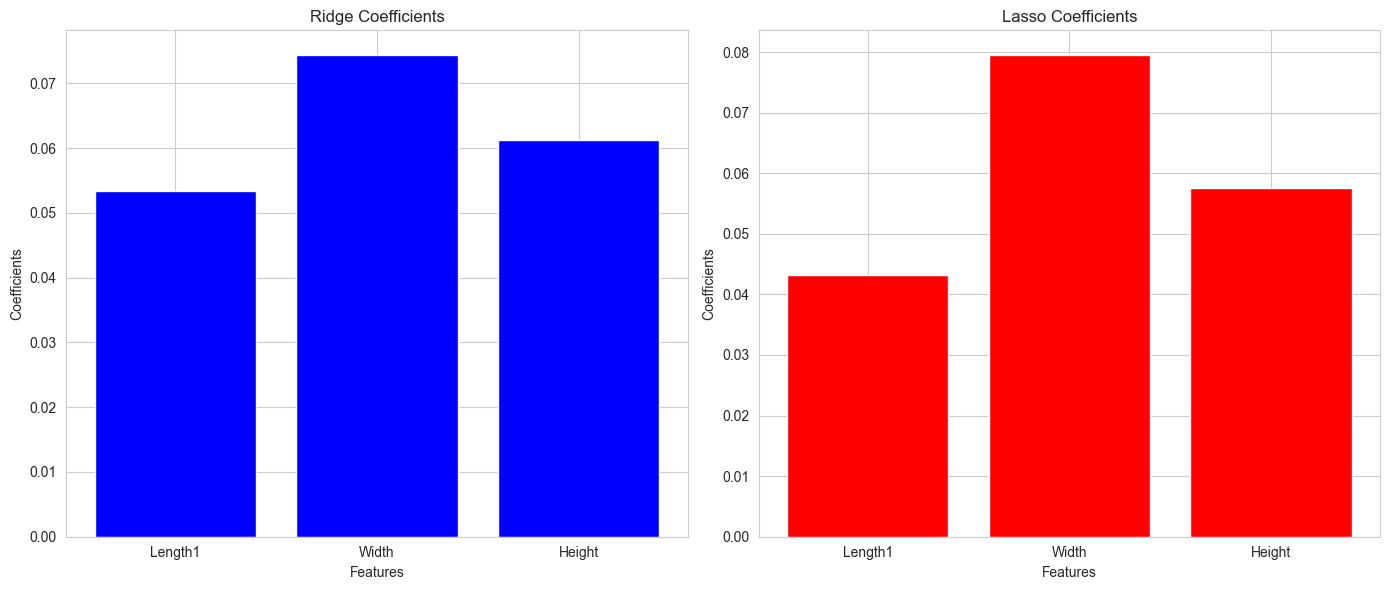

In [52]:
# For the best ridge and lasso models
# Fit the models with the best alpha

#ridge with the best alpha
best_ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=ridge_best_alpha))
])
best_ridge_model.fit(x_train, y_train)

# Lasso with the best alpha
best_lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=lasso_best_alpha))
])
best_lasso_model.fit(x_train, y_train)

# Get the coefficients for both models
ridge_coefs = best_ridge_model.named_steps["ridge"].coef_
lasso_coefs = best_lasso_model.named_steps["lasso"].coef_

#print the coefs
print("Ridge Coefficients with alpha =", ridge_best_alpha)
print(ridge_coefs)

print("\nLasso Coefficients with alpha =", lasso_best_alpha)
print(lasso_coefs)

# Plot the coef for both models
feature_names = ['Length1', 'Width', 'Height']
plt.figure(figsize=(14, 6))

# ridge coefs
plt.subplot(1, 2, 1)
plt.bar(feature_names, ridge_coefs, color="blue")
plt.title("Ridge Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficients")

# Lasso coefs
plt.subplot(1, 2, 2)
plt.bar(feature_names, lasso_coefs, color="red")
plt.title("Lasso Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficients")

plt.tight_layout()
plt.show()


Advanced: apply these methods to the entire fish market dataset. Do you get consistent results for the polynomial order for each species?

P:\OneDrive - Macquarie University\Master's Program\Master UNit guide\COMP6200 - Data Science\WorkShop\data-science-backup\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e-04, tolerance: 4.009e-05
  model = cd_fast.enet_coordinate_descent(
P:\OneDrive - Macquarie University\Master's Program\Master UNit guide\COMP6200 - Data Science\WorkShop\data-science-backup\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.351e-03, tolerance: 4.009e-05
  model = cd_fast.enet_coordinate_descent(
P:\OneDrive - Macquarie University\Master's Program\Master UNit guide\COMP6200 - Data Sc

Best polynomial orders for ridge and lasso for species:
     species  best_ridge_poly_order  best_lasso_poly_order
0      Bream                      3                      5
1      Roach                      2                      3
2  Whitefish                      1                      1
3     Parkki                      4                      5
4      Perch                      2                      1
5       Pike                      3                      1
6      Smelt                      1                      9
Processed DataFrame (Ridge):
  species  best_ridge_poly_order  best_lasso_poly_order  ridge_r2s  \
0   Bream                      3                      5   0.804674   
0   Bream                      3                      5   0.814839   
0   Bream                      3                      5   0.833564   
0   Bream                      3                      5   0.783578   
0   Bream                      3                      5   0.239683   

                      

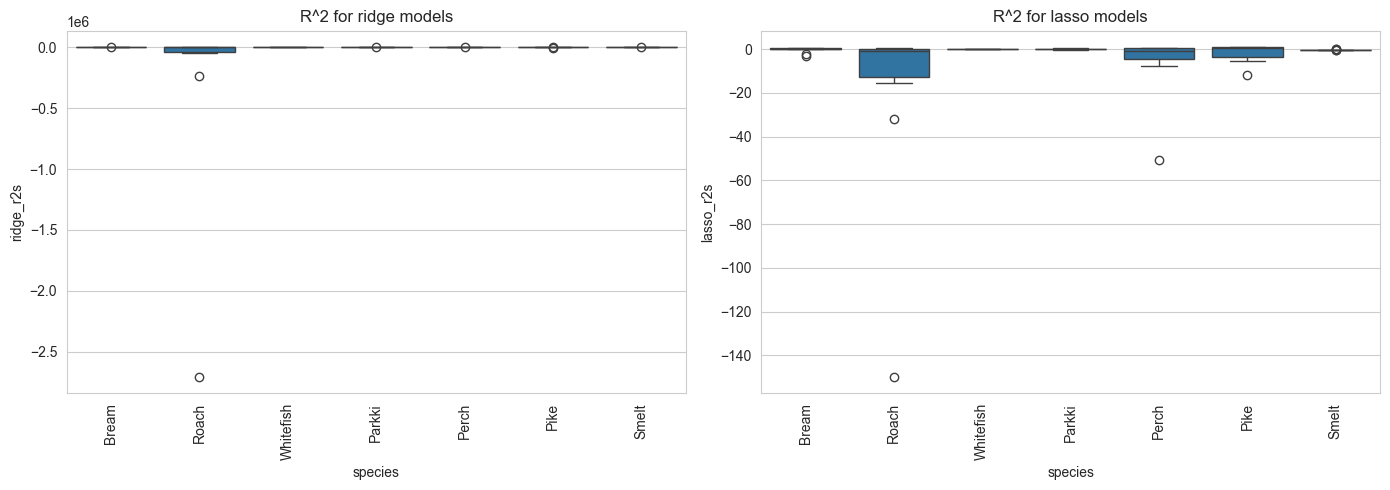

In [53]:
# Assume df is the fish market datasheet, with species as one of the columns
# preprocess the data: Normalization of features
scaler = preprocessing.MinMaxScaler()
params = ['Length1', 'Length2', 'Length3', 'Weight', 'Width', 'Height']

# Normalize the data
scaler.fit(df[params])
df[params] = scaler.transform(df[params])

# set up species name for looping
species_list = df['Species'].unique();

# Initialize variables to store results
best_polynomial_orders = {}
results = []

# Loop over each species
for species in species_list:
    species_data = df[df['Species'] == species]
    x = species_data[['Length1', 'Width', 'Height']]
    y = species_data['Weight']
    #split into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Store R^2 scores for different polynomial degrees

    r2s_ridge = []
    maes_ridge = []
    rmses_ridge = []
    r2s_lasso = []
    maes_lasso = []
    rmses_lasso = []

    # Evaluate models with polynomial degree from 1 to 10
    for poly_order in range(1, 11):
        #ridge regression pipeline
        ridge_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=poly_order)),
            ("ridge", Ridge(alpha=0.1, max_iter=50000, tol=1e-4)) #higher alpha, max iter and adj tolerance
        ])
        #lasso regression pipeline
        lasso_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=poly_order)),
            ("lasso", Lasso(alpha=0.1, max_iter=10000, tol=1e-3)) #higher max iter and tolerance
        ])
        # Fit the models
        ridge_pipeline.fit(x_train, y_train)
        lasso_pipeline.fit(x_train, y_train)

        # Evaluate performance on the test data
        y_ridge_pred = ridge_pipeline.predict(x_test)
        y_lasso_pred = lasso_pipeline.predict(x_test)

        # Calculate performance matrix for ridge
        r2_ridge = metrics.r2_score(y_test, y_ridge_pred)
        mae_ridge = metrics.mean_absolute_error(y_test, y_ridge_pred)
        rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_ridge_pred))

        # Calculate performance metrics for lasso
        r2_lasso = metrics.r2_score(y_test, y_lasso_pred)
        mae_lasso = metrics.mean_absolute_error(y_test, y_lasso_pred)
        rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_lasso_pred))

        #Append results
        r2s_ridge.append(r2_ridge)
        maes_ridge.append(mae_ridge)
        rmses_ridge.append(rmse_ridge)
        r2s_lasso.append(r2_lasso)
        maes_lasso.append(mae_lasso)
        rmses_lasso.append(rmse_lasso)

    #Store the best polynomial order for each species based on R^2 (or another metric)
    best_polynomial_order_ridge = np.argmax(r2s_ridge) + 1
    best_polynomial_order_lasso = np.argmax(r2s_lasso) + 1

    best_polynomial_orders[species] = {
        "best_ridge_poly_order" : best_polynomial_order_ridge,
        "best_lasso_poly_order" : best_polynomial_order_lasso
    }

    # Store detailed results for comparison
    results.append({
        "species": species,
        "best_ridge_poly_order": best_polynomial_order_ridge,
        "best_lasso_poly_order": best_polynomial_order_lasso,
        "ridge_r2s": r2s_ridge,
        "lasso_r2s": r2s_lasso,
        })

# Convert results into a dataframe
results_df = pd.DataFrame(results)
#display the best polynomial order
print(f"Best polynomial orders for ridge and lasso for species:")
print(results_df[['species', 'best_ridge_poly_order', 'best_lasso_poly_order']])



# Process `ridge_r2s` and 'lasso_r2s' column to prepare it for Seaborn
results_df_processed = results_df.explode("ridge_r2s")
results_df_processed1 = results_df.explode("lasso_r2s")


# Check to confirm the column is numeric and properly exploded
results_df_processed["ridge_r2s"] = pd.to_numeric(results_df_processed["ridge_r2s"], errors="coerce")
results_df_processed1["lasso_r2s"] = pd.to_numeric(results_df_processed1["lasso_r2s"], errors="coerce")
print("Processed DataFrame (Ridge):")
print(results_df_processed.head())
print("Processed DataFrame (Lasso):")
print(results_df_processed1.head())
# Plot the boxplot
plt.figure(figsize=(14, 5))

#Ridge R^2 scores
plt.subplot(1, 2, 1)
sns.boxplot(x="species", y="ridge_r2s", data=results_df_processed)
plt.title("R^2 for ridge models")
plt.xticks(rotation=90)

#Lasso R^2 scores
plt.subplot(1, 2, 2)
sns.boxplot(x="species", y="lasso_r2s", data=results_df_processed1)
plt.title("R^2 for lasso models")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()






# Plot R^2 score for lasso and ridge
#plt.figure(figsize=(14, 7))

#Ridge R^2 scores
#plt.subplot(1, 2, 1)
#sns.boxplot(x="species", y="ridge_r2s", data=results_df.melt(id_vars=["species"],value_vars=["ridge_r2s"]))
#plt.title("R^2 for ridge models")
#plt.xticks(rotation=90)

#Lasso R^2 scores
#plt.subplot(1, 2, 2)
#sns.boxplot(x="species", y="lasso_r2s", data=results_df.melt(id_vars=["species"], value_vars=["lasso_r2s"]))
#plt.title("R^2 for lasso models")
#plt.xticks(rotation=90)

#plt.tight_layout()
#plt.show()


In [54]:
## Check if `species` and `ridge_r2s` exist in `results_df`
#if "species" not in results_df.columns or "ridge_r2s" not in results_df.columns:
    #raise ValueError("The required columns ('species', 'ridge_r2s') do not exist in results_df.")

#print("Initial DataFrame structure:")
#print(results_df.head())
#print(results_df.info())


In [55]:
# Melt the DataFrame
#melted_df = results_df.melt(id_vars=["species"], value_vars=["ridge_r2s"], var_name="metric", value_name="value")

#print("After Melt Operation:")
#print(melted_df.head())
#print(melted_df.info())


In [56]:
#try:
    #plt.figure(figsize=(10, 5))
    #sns.boxplot(x="species", y="ridge_r2s", data=results_df_processed)
    #plt.title("R² for ridge models")
    #plt.xticks(rotation=90)
    #plt.show()
#except Exception as e:
    #print(f"Error while plotting: {e}")


In [57]:
#try:
    #plt.figure(figsize=(10, 5))
    #sns.boxplot(x="species", y="lasso_r2s", data=results_df_processed1)
    #plt.title("R² for lasso models")
    #plt.xticks(rotation=90)
    #plt.show()
#except Exception as e:
    #print(f"Error while plotting: {e}")

---

## Logistic Regression

We learned about logistic regression in lectures; now let's apply it to a real dataset. The fish market is too small for interesting logistic regression; and furthermore, the fish species separate out very well in the feature space, so there is no challenge.

Let us now look at a dataset from the University of California, Irvine (UCI) Machine Learning Repository, about wine quality. This lists a number of wines—red and white - and continuous-valued chemical properties. One goal is to predict the quality of the wine based on these properties; but this is also a good opportunity to use a large dataset for logistic regression, to simply predict whether the wine is red or white.

In [58]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=186) 
wine_df = pd.DataFrame(wine.data.original)

In [59]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [60]:
# normalize the data
scaler = preprocessing.MinMaxScaler()
print(list(wine_df.keys().copy())) # there are a lot of features - if you use all of these, it's too easy!

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']


In [61]:
params = ['citric_acid', 'residual_sugar'] # pick some features - try starting with 2 and going from there

small_wine = wine_df[[*params,'color']]

scaler.fit(small_wine[params])
#small_wine[params] = scaler.transform(small_wine[params])
small_wine.loc[:, params] = scaler.transform(small_wine[params])

small_wine.head()

train, test = model_selection.train_test_split(small_wine, test_size=0.2)

In [62]:
small_wine.head()

,citric_acid,residual_sugar,color
0,0.000000,0.019939,red
1,0.000000,0.030675,red
2,0.024096,0.026074,red
3,0.337349,0.019939,red
4,0.000000,0.019939,red


Always visualize your data:

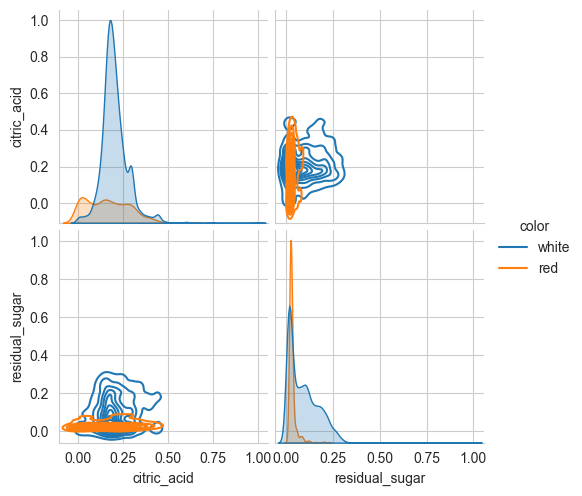

In [63]:
sns.pairplot(train, hue='color', kind='kde');

Initialize a logistic regression model:

In [64]:
logistic = linear_model.LogisticRegression()
logistic.C = 1e5 # play with C - this may need to vary - to do this systematically, use a loop and test
x = np.array(train[params])
logistic.fit(x, train.color=='red');

There is a great way to visualize the decision boundaries of a logistic regression model; let's import some things to do that:

In [65]:
from sklearn.inspection import DecisionBoundaryDisplay # this is for rendering decision boundaries for 2d classifiers
# there are some nice blue and red color maps
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

P:\OneDrive - Macquarie University\Master's Program\Master UNit guide\COMP6200 - Data Science\WorkShop\data-science-backup\.venv\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:194: UserWarning: The following kwargs were not used by contour: 'fill_contours'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


(0.0, 1.0)

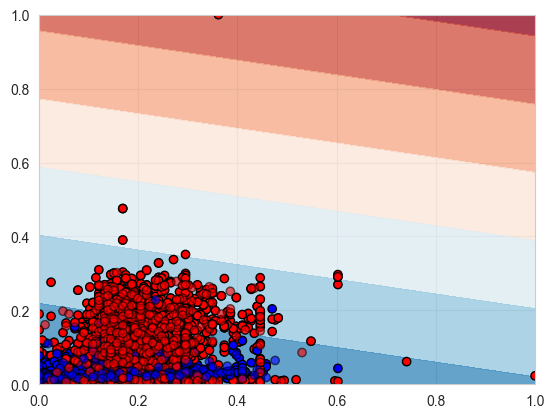

In [66]:
ax = plt.gca() # be able to access the axis so you can plot multiple things overlaid

DecisionBoundaryDisplay.from_estimator(
    logistic, x, cmap=cm, alpha=0.8, eps=0.1, fill_contours=True, ax=ax
)
# Convert features to NumPy arrays if not already
x_train = np.array(train[params])
x_test = np.array(test[params])

# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=train.color=='red', cmap=cm_bright, edgecolors="k")

# Plot the testing points
#x_test = np.array(test[params])
ax.scatter(x_test[:, 0], x_test[:, 1], c=test.color=='red', cmap=cm_bright, alpha=0.6, edgecolors="k")

ax.set_xlim(0,1)
ax.set_ylim(0,1)

Now we want to quantify the performance of the model. We can use the confusion matrix, which is a 2x2 matrix where the rows are the true classes, and the columns are the predicted classes. The diagonal elements are the number of correct predictions, and the off-diagonal elements are the number of incorrect predictions.

<Axes: >

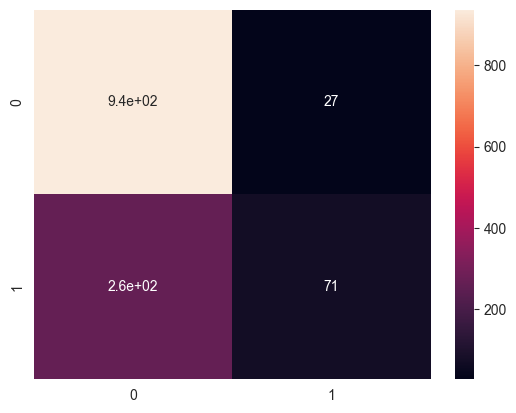

In [67]:
# confusion matrix
confusion = metrics.confusion_matrix(test.color=='red', logistic.predict(x_test))
sns.heatmap(confusion, annot=True)

How well do they separate? Do some sets of parameters overlap more or less? Try out the above calculation for different features. You may like to use it for loops or other scripting to do this automatically. Store the results of the confusion matrix each time, and what percentages of data are on the diagonal vs. off.

One way to quantify the performance of a classifier is to use the ROC curve. This is a plot of the true positive rate (TPR) against the false positive rate (FPR) as you vary the threshold for the classifier. Ideally, the true positive rate should be very high while keeping the false positive rate very low! The area under the curve (AUC) is a measure of the performance of the classifier: 1 is perfect (i.e., all true positives are found, no false positives are found), 0.5 is random (i.e., true positive rate = false positive rate = random).

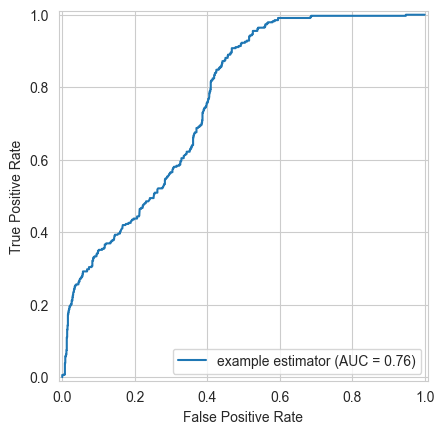

In [68]:
y = test.color=='red'
pred = logistic.predict_log_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

Set up a loop to optimize the AUC for the logistic regression, picking different features in pairs or triplets. Which features give the best AUC? What is the best AUC you can achieve?

## Advanced

In the cells below, use a pipeline to fit linear or logistic regression models to predict 

- (linear) wine quality, or 
- (logistic) where wine is top-quality (quality >5) or not, 

varying other parameter sets and regularization. Use the `quality` column to create a binary label, and use the other columns as features. You will need to consider all features, polynomials of those features, and regularization.